In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("Consolidated data for figures - auc 0.7 0.9 all assays Early Fusion.csv")

In [4]:
CS = df[df["descriptor"] == "CP"]
MO = df[df["descriptor"] == "MO"]
GE = df[df["descriptor"] == "GE"]

x > y: 155 x < y: 221


<Figure size 432x432 with 0 Axes>

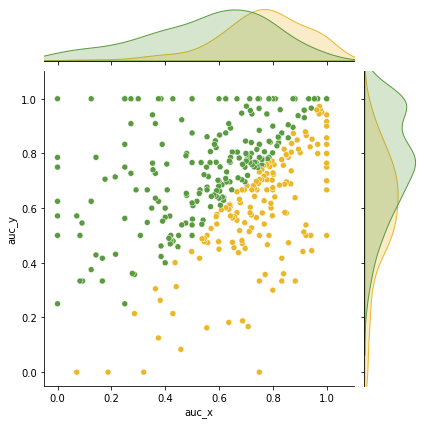

In [44]:
# x=CS , y=MO
plt.figure(figsize=(6,6))
data = pd.merge(CS, MO, on="assay_id")[["assay_id", "auc_x", "auc_y"]]
data["best"] = data["auc_x"] > data["auc_y"]
print("x > y:", np.sum(data["best"]), "x < y:", data.shape[0] - np.sum(data["best"]))
g = sb.jointplot(data=data, x="auc_x", y="auc_y", kind="scatter", hue="best", 
                 legend=False, xlim=(-.05,1.1), ylim=(-0.05,1.1), palette=["#599b3e", "#ecb727"])

x > y: 223 x < y: 153


<Figure size 432x432 with 0 Axes>

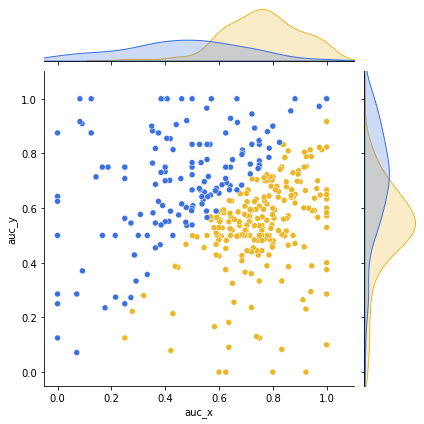

In [45]:
# x=CS , y=GE
plt.figure(figsize=(6,6))
data = pd.merge(CS, GE, on="assay_id")[["assay_id", "auc_x", "auc_y"]]
data["best"] = data["auc_x"] > data["auc_y"]
print("x > y:", np.sum(data["best"]), "x < y:", data.shape[0] - np.sum(data["best"]))
g = sb.jointplot(data=data, x="auc_x", y="auc_y", kind="scatter", hue="best", 
                 legend=False, xlim=(-.05,1.1), ylim=(-0.05,1.1), palette=["#3b70e2", "#ecb727"])

x > y: 247 x < y: 129


<Figure size 432x432 with 0 Axes>

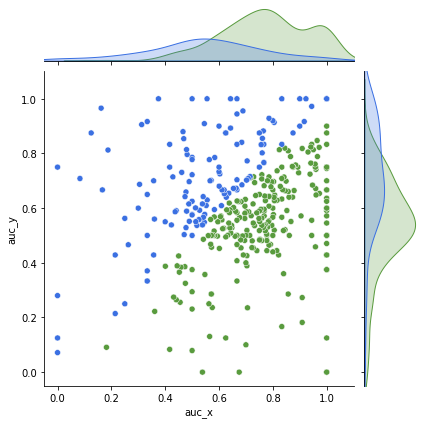

In [46]:
# x=MO , y=GE
plt.figure(figsize=(6,6))
data = pd.merge(MO, GE, on="assay_id")[["assay_id", "auc_x", "auc_y"]]
data["best"] = data["auc_x"] > data["auc_y"]
print("x > y:", np.sum(data["best"]), "x < y:", data.shape[0] - np.sum(data["best"]))
g = sb.jointplot(data=data, x="auc_x", y="auc_y", kind="scatter", hue="best", 
                 legend=False, xlim=(-.05,1.1), ylim=(-0.05,1.1), palette=["#3b70e2", "#599b3e"])

In [22]:
counts = []
for t in np.arange(0.1, 1., 0.01):
    counts.append({"Threshold":t, "Count":np.sum(CS["auc"] > t), "Type":"CS"})
    counts.append({"Threshold":t, "Count":np.sum(GE["auc"] > t), "Type":"GE"})
    counts.append({"Threshold":t, "Count":np.sum(MO["auc"] > t), "Type":"MO"})

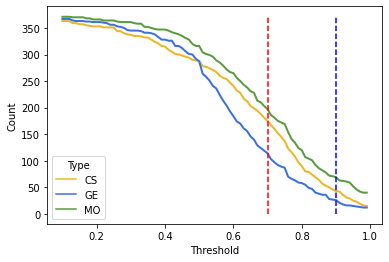

In [52]:
counts = pd.DataFrame(data=counts)
sb.lineplot(data=counts, x="Threshold", y="Count", hue="Type", 
            palette=["#ecb727", "#3b70e2", "#599b3e"], linewidth=2)
plt.plot([0.9,0.9],[0.0,372], "--b") # , palette=["#ecb727", "#599b3e", "#3b70e2"]
plt.plot([0.7,0.7],[0.0,372], "--r")